In [550]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

%matplotlib inline

In [488]:
# use pandas to read files

# we don't have a header, and we don't want the first column to be index values
training = pd.read_csv("../mnist_dataset/mnist_train.csv", header=None, index_col=False)
# take the first column and store as labels as numpy array
training_labels = np.asfarray(training.iloc[:,0])
# delete the first column and use the rest as data as numpy array
training_features = np.asfarray(training.drop(columns=[0]))

# use pandas to read file
# we don't have a header, and we don't want the first column to be index values
test = pd.read_csv("../mnist_dataset/mnist_test.csv", header=None, index_col=False)
# take the first column and store as labels as numpy array
test_labels = np.asfarray(test.iloc[:,0])
# delete the first column and use the rest as data as numpy array
test_features = np.asfarray(test.drop(columns=[0]))

In [489]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[784])]

In [543]:
# Build a DNN with 1 hidden layers and 500 nodes in the hidden layer.
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Three hidden layers
    hidden_units=[512, 512, 100],
    optimizer=tf.train.AdamOptimizer(1e-4),
    # The model must choose between 10 classes.
    n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1e3223d0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/2z/khrnj_dn3zv_t52wp04myk200000gn/T/tmpdV5z9m', '_save_summary_steps': 100}


In [544]:
# Define the training inputs
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": training_features},
    y=training_labels.astype(np.int32),
    num_epochs=20,
    batch_size=100,
    shuffle=True
)

In [546]:
classifier.train(input_fn=train_input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/2z/khrnj_dn3zv_t52wp04myk200000gn/T/tmpdV5z9m/model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into /var/folders/2z/khrnj_dn3zv_t52wp04myk200000gn/T/tmpdV5z9m/model.ckpt.
INFO:tensorflow:loss = 7162.912, step = 2
INFO:tensorflow:global_step/sec: 152.31
INFO:tensorflow:loss = 180.45035, step = 102 (0.658 sec)
INFO:tensorflow:global_step/sec: 162.382
INFO:tensorflow:loss = 285.1347, step = 202 (0.616 sec)
INFO:tensorflow:global_step/sec: 163.271
INFO:tensorflow:loss = 236.97452, step = 302 (0.612 sec)
INFO:tensorflow:global_step/sec: 163.726
INFO:tensorflow:loss = 116.87785, step = 402 (0.611 sec)
INFO:tensorflow:global_step/sec: 169.118
INFO:tensorflow:loss = 100.327835, step = 502 (0.591 sec)
INFO:tensorflow:global_step/sec: 136.7
INFO:tensorflow:loss = 80.79166, step = 602 (0.732 sec)
INFO:tensorflow:global_step/sec: 166.064
INFO:tensorflow:loss = 160.5684, step = 702 (0.602 sec)
IN

INFO:tensorflow:global_step/sec: 142.492
INFO:tensorflow:loss = 0.5859731, step = 8102 (0.702 sec)
INFO:tensorflow:global_step/sec: 137.228
INFO:tensorflow:loss = 2.0463116, step = 8202 (0.729 sec)
INFO:tensorflow:global_step/sec: 132.646
INFO:tensorflow:loss = 6.9014153, step = 8302 (0.754 sec)
INFO:tensorflow:global_step/sec: 137.812
INFO:tensorflow:loss = 0.6587877, step = 8402 (0.726 sec)
INFO:tensorflow:global_step/sec: 141.257
INFO:tensorflow:loss = 0.5262279, step = 8502 (0.708 sec)
INFO:tensorflow:global_step/sec: 128.695
INFO:tensorflow:loss = 3.4205606, step = 8602 (0.777 sec)
INFO:tensorflow:global_step/sec: 125.54
INFO:tensorflow:loss = 0.0006619233, step = 8702 (0.797 sec)
INFO:tensorflow:global_step/sec: 137.774
INFO:tensorflow:loss = 2.4484236, step = 8802 (0.726 sec)
INFO:tensorflow:global_step/sec: 121.083
INFO:tensorflow:loss = 0.026545169, step = 8902 (0.826 sec)
INFO:tensorflow:global_step/sec: 134.403
INFO:tensorflow:loss = 0.0019462681, step = 9002 (0.744 sec)
INF

In [541]:
# Define the test inputs
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": test_features},
    y=test_labels.astype(np.int32),
    num_epochs=1,
    shuffle=False
)

In [552]:
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
print("\nTest Accuracy: {0:.2f}%\n".format(accuracy_score*100))

INFO:tensorflow:Starting evaluation at 2018-03-18-12:40:13
INFO:tensorflow:Restoring parameters from /var/folders/2z/khrnj_dn3zv_t52wp04myk200000gn/T/tmpdV5z9m/model.ckpt-12001
INFO:tensorflow:Finished evaluation at 2018-03-18-12:40:14
INFO:tensorflow:Saving dict for global step 12001: accuracy = 0.9727, average_loss = 0.30947918, global_step = 12001, loss = 39.17458

Test Accuracy: 97.27%



INFO:tensorflow:Restoring parameters from /var/folders/2z/khrnj_dn3zv_t52wp04myk200000gn/T/tmpdV5z9m/model.ckpt-12001


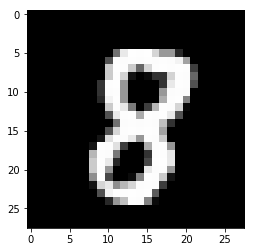

Model prediction: 8
Labeled: 8


In [551]:
# Predict single image

whichImage = random.randint(0,len(test_features))
# Get image from test set
test_image = test_features[whichImage].reshape(1, 784)

# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x': test_image}, shuffle=False)

# Use the model to predict the images class
preds = list(classifier.predict(input_fn))

# Display
plt.imshow(np.reshape(test_image, [28, 28]), cmap='gray')
plt.show()

p = int(preds[0]['classes'][0])
print("Model prediction:", p)
print("Labeled:",test_labels[whichImage].astype(np.int32))